In [542]:
"""Initial Imports"""
import pandas as pd
import numpy as np
import re
import tweepy
import datetime
from pandas_datareader import data as web
from textblob import TextBlob
from sklearn.svm import SVR
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [543]:
consumer_key = "W8olFrRLK7Lt7BUh6YAbdSG4h"
consumer_secret = "izRdiwC73rntSdMdAQm2gL8zFNAHVLa99A8dI99w0Lz16jvNrx"

access_token = "620364433-Kj5up6bB6KLfl5wfmxxcAnWthse5o38P2MKABM00"
access_token_secret = "Faxxv0hb54KF7MmakQ8WZmvaCC5YIprcWhiOuEyQY2iLt"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

fetch_tweets=tweepy.Cursor(api.search, q="#TSLA",count=100, lang ="en",since="2019-9-25", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

data.to_csv("TeslaTweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
print("Created CSV")

Created CSV


In [544]:
##Read the data
data = pd.read_csv('tweets_data_old_elonmusk.csv')

In [545]:
cdata=pd.DataFrame(columns=['Date','Tweets'])
print(len(data))

3218


In [546]:
##clean up the tweets
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.at[index,'Date'] =row["Date"]
    cdata.at[index,'Tweets']= my_new_string
    #index=index+1
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [547]:
#clubbed tweets date wise
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.at[indx,'Date']=get_date
        ccdata.at[indx,'Tweets']=get_tweet
        indx+=1
        get_tweet=" "

In [548]:
ccdata = pd.read_csv('Tesla_tweets_old.csv')
ccdata.head()

,Unnamed: 0,Date,Tweets
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...
1,1,9/28/2017,kevinroose Just another day in the office Fas...
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...
4,4,9/25/2017,Daimler Good Major improvements some unexpec...


% of positive tweets=  87.97814207650273
% of negative tweets=  12.021857923497267


[]

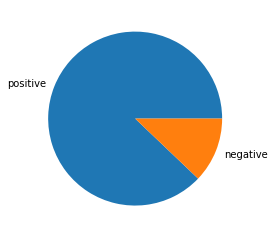

In [549]:
"""Doing Sentiment Analysis of tweets"""

ccdata['polarity'] = 0.0000
for index,row in ccdata.iterrows():
    analysis = TextBlob(ccdata['Tweets'][index])
    sentiment, confidence  = analysis.sentiment
    ccdata.at[index,'polarity'] = sentiment
    
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata['polarity'][i]
    if(float(get_val)<(0)):
        nega=nega+1
    else:
        posi=posi+1
        
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()

In [550]:
"""Get Stock Price From Yahoo using Pandas.dataReader"""

start = datetime.datetime(2012,10,26)
## Let's get Tesla stock data; Tesla's ticker symbol is TSLA
## First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, 
##fourth is the end date
tesla = web.DataReader('TSLA', 'yahoo', start)
#tesla.to_csv('TESLA_stock_price.csv')

In [551]:
read_stock_p=pd.read_csv('TESLA_stock_price.csv')
read_stock_p.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,10/26/2012,27.799999,27.020000,27.530001,27.379999,477400,27.379999
1,10/31/2012,28.350000,27.370001,27.700001,28.129999,775200,28.129999
2,11/1/2012,29.490000,28.200001,28.250000,29.250000,1024100,29.250000
3,11/2/2012,29.549999,28.549999,29.270000,28.920000,1030300,28.920000
4,11/5/2012,31.580000,29.330000,29.799999,31.500000,2048900,31.500000


In [552]:
"""Add the stock price value matching tweets for the day"""

ccdata['Prices']=""
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]             
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices']=int(read_stock_p.Close[j])
            break

In [553]:
"""Show that there are some empty fields for days when stock Market is closed"""

'Show that there are some empty fields for days when stock Market is closed'

In [554]:
ccdata.head(8)

,Unnamed: 0,Date,Tweets,polarity,Prices
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,341
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,339
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,340
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,345
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,344
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,-0.125000,
6,11,9/14/2017,High res version at httpstcoYysKftHhoz jovani...,0.187143,377
7,13,9/12/2017,RT Gizmodo Hackers have already started to we...,-0.600000,362


In [555]:
"""Filling empty price with previous day price"""
for i in range(1,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
            ccdata.Prices.iloc[i]=int(ccdata.Prices.iloc[i-1])

#ccdata['Prices'] = ccdata['Prices'].apply(np.int64)


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [556]:
ccdata.head(6)

,Unnamed: 0,Date,Tweets,polarity,Prices
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,341
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,339
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,340
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,345
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,344
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,-0.125000,344


In [557]:
"""Adding Percent change column in the dataset"""
ccdata['percent change'] = 0.0000
for i in range(0,len(ccdata)-1):
    ccdata.at[i,'percent change']=float((ccdata.Prices.iloc[i+1]-ccdata.Prices.iloc[i])/ccdata.Prices.iloc[i])

#ccdata['percent change'] = ccdata['percent change'].apply(np.float)
ccdata.dtypes  

Unnamed: 0          int64
Date               object
Tweets             object
polarity          float64
Prices              int64
percent change    float64
dtype: object

In [558]:
ccdata.shape

(549, 6)

In [559]:
ccdata.to_csv("Tesla_tweets_with_stocks_old.csv")

In [560]:
ccdata.head(3)

,Unnamed: 0,Date,Tweets,polarity,Prices,percent change
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,341,-0.005865
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,339,0.002950
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,340,0.014706


In [561]:
"""Parttion the data in train and test
Train the model with past four years data 
and predict the price change for next years"""

test1 = ccdata.iloc[0:199]
train1 = ccdata.iloc[200:549]

train = train1.to_numpy()
test = test1.to_numpy()

X_train= np.array([x[-3] for x in train])
y_train = np.array([x[-1] for x in train])

X_test= np.array([x[-3] for x in test])
y_test = np.array([x[-1] for x in test])
#y= np.array(ccdata['Prices'].values).astype(float)
#(X_train,X_test,y_train,y_test) = train_test_split(X, y, test_size=0.2, random_state=0)

In [578]:
"""1 Random Forest Learner"""

rf = RandomForestRegressor()
rf.fit(X_train.reshape(-1,1), y_train)
prediction, bias, contributions = ti.predict(rf, X_test.reshape(-1,1))
rf.predict(X_test.reshape(-1,1))
rf.score(X_train.reshape(-1,1),y_train)

[[-0.03973116]
 [ 0.02373477]
 [ 0.00282697]
 [ 0.01020634]
 [ 0.00572553]
 [ 0.01591109]
 [ 0.00379785]
 [ 0.00025187]
 [ 0.04882475]
 [ 0.10214155]
 [-0.04086585]
 [-0.03571411]
 [-0.03958796]
 [ 0.03775443]
 [-0.0347907 ]
 [-0.08722122]
 [-0.00489835]
 [ 0.04023082]
 [-0.02317178]
 [-0.0212384 ]
 [ 0.01020634]
 [-0.00489835]
 [ 0.02816434]
 [-0.03145874]
 [ 0.00282697]
 [ 0.01020634]
 [-0.04937485]
 [-0.01899228]
 [-0.00128975]
 [ 0.02373477]
 [ 0.02373477]
 [-0.00199466]
 [ 0.02188358]
 [-0.03371347]
 [ 0.02373477]
 [ 0.00025187]
 [-0.06139525]
 [ 0.00958953]
 [-0.00128975]
 [-0.00199466]
 [ 0.00544993]
 [ 0.00502907]
 [ 0.01057437]
 [ 0.04068915]
 [ 0.02847392]
 [ 0.00379316]
 [ 0.00282697]
 [-0.028588  ]
 [-0.00128975]
 [ 0.01148082]
 [-0.04662472]
 [-0.03066212]
 [-0.03973116]
 [ 0.00741782]
 [-0.03973116]
 [ 0.01152263]
 [ 0.02260088]
 [-0.00069081]
 [ 0.03771663]
 [ 0.00502707]
 [-0.01895529]
 [ 0.02816434]
 [-0.01814097]
 [-0.03727492]
 [ 0.02373477]
 [-0.00128975]
 [ 0.00900

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4547265363577607

In [563]:
"""2 Another Learner"""

'2 Another Learner'

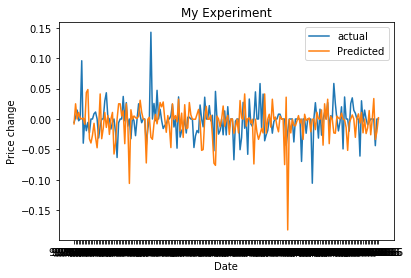

In [564]:
date_test = np.array([x[1] for x in test])
plt.plot(date_test,y_test, label="actual")
plt.plot(date_test,prediction, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('My Experiment')
plt.legend()
plt.show()

In [574]:
"""2 Linear Regression"""

from sklearn.linear_model import LinearRegression 

regr = LinearRegression()  
regr.fit(X_train.reshape(-1,1), y_train)  
a=regr.predict(X_test.reshape(-1,1))
regr.score(X_train.reshape(-1,1),y_train)

[ 0.03092784  0.06       -0.00471698  0.01895735  0.          0.03255814
  0.00900901 -0.00446429  0.          0.0044843   0.00446429  0.01777778
  0.          0.          0.          0.02183406 -0.02564103  0.00438596
  0.         -0.03930131  0.03636364 -0.01315789  0.00444444  0.
  0.         -0.02654867  0.00454545  0.01357466  0.          0.
  0.         -0.03571429 -0.00462963 -0.00465116 -0.0046729  -0.01408451
 -0.05714286  0.          0.08585859  0.00930233  0.          0.
  0.00460829  0.05045872  0.02620087 -0.06382979  0.          0.
 -0.00909091  0.          0.          0.03211009 -0.02666667 -0.01826484
 -0.01860465 -0.03317536  0.01960784  0.         -0.00480769  0.
  0.00483092  0.          0.02884615 -0.01401869  0.09952607  0.0387931
  0.          0.         -0.00414938  0.04583333  0.          0.00796813
 -0.01581028  0.01606426 -0.01581028  0.          0.00401606  0.028
  0.0311284  -0.07169811  0.          0.         -0.03658537 -0.03375527
 -0.01310044  0.02654867

7.046647359054692e-05

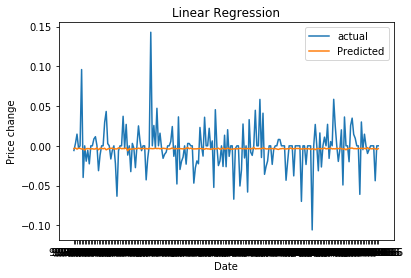

In [572]:
date_test = np.array([x[1] for x in test])
plt.plot(date_test,y_test, label="actual")
plt.plot(date_test,a, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('Linear Regression')
plt.legend()
plt.show()